In [1]:
# !pip install wordcloud
# !pip install multidict

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import os
from os import path
import MeCab
import unidic
import sys
import re
import unicodedata
import matplotlib.pyplot as plt
import tqdm
import japanize_matplotlib
import collections
import glob
import multidict as multidict

## wordcloud for all words

In [3]:
# Create wordcloud image for every words
fields = ['word',"count"]

## CHANGE FILE NAME!!!
text_all = pd.read_csv('f_scientist_text_overall.csv', encoding='UTF-8',usecols=fields)
text_all.set_index("word").to_dict()
text_all_dict = text_all.set_index("word").to_dict()['count']

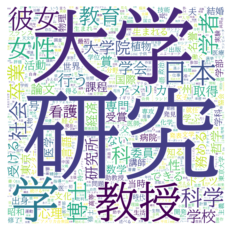

In [4]:
wc = WordCloud(background_color="white", \
               max_words=1000,font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=900,height=900)

# generate word cloud
wc.generate_from_frequencies(text_all_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_fScientist_all.png")


In [5]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.getElementsByTagName("svg")[0];
    text_tags =  svg.getElementsByTagName("text")
    for(var i=0; i<text_tags.length; i++){
        text_tags[i].addEventListener(
            "click",
            function(){
                word = this.textContent;
                word_uri = encodeURI(word);
                url = "https://jisho.org/search/" + word_uri;
                window.open(url, "_bkank");
            }
        )
    }
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("femaleScientictAll.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Noun wordcloud

In [6]:
# create wc for noun(名詞)
df = pd.read_csv('f_scientist_text_overall.csv', encoding='UTF-8')
noun = df[df.pos == "名詞"]
noun2 = noun.drop("pos", axis=1)
noun2.head()

,word,count
0,研究,4217
1,大学,2874
2,学,2869
3,教授,2212
4,日本,2190


In [7]:
noun2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12334 entries, 0 to 13494
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    12334 non-null  object
 1   count   12334 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 289.1+ KB


In [8]:
noun_dict = noun2.set_index("word").to_dict()['count']

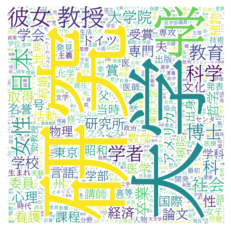

In [9]:
wc = WordCloud(background_color="white", \
               max_words=1000,font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=900,height=900)

# generate word cloud
## CHANGE (blah)
wc.generate_from_frequencies(noun_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_fScientist_noun.png")


In [10]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.getElementsByTagName("svg")[0];
    text_tags =  svg.getElementsByTagName("text")
    for(var i=0; i<text_tags.length; i++){
        text_tags[i].addEventListener(
            "click",
            function(){
                word = this.textContent;
                word_uri = encodeURI(word);
                url = "https://jisho.org/search/" + word_uri;
                window.open(url, "_bkank");
            }
        )
    }
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("femaleScientictNoun.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Verb

In [11]:
# verb (動詞)
df = pd.read_csv('f_scientist_text_overall.csv', encoding='UTF-8')
## CHANGE POS
verb = df[df.pos == "動詞"]
verb2 = verb.drop("pos", axis=1)
verb2.head()

,word,count
15,行う,826
21,受ける,675
23,務める,668
32,できる,549
47,生まれる,454


In [12]:
verb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 15 to 13433
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    1033 non-null   object
 1   count   1033 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.2+ KB


In [13]:
verb_dict = verb2.set_index("word").to_dict()['count']

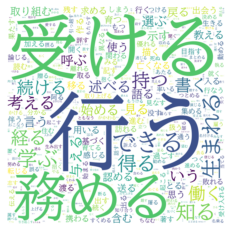

In [14]:
wc = WordCloud(background_color="white", \
               max_words=500, #change if needed\
               font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=900,height=900)

# generate word cloud
## CHANGE (blah)
wc.generate_from_frequencies(verb_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_fScientist_verb.png")

In [15]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.getElementsByTagName("svg")[0];
    text_tags =  svg.getElementsByTagName("text")
    for(var i=0; i<text_tags.length; i++){
        text_tags[i].addEventListener(
            "click",
            function(){
                word = this.textContent;
                word_uri = encodeURI(word);
                url = "https://jisho.org/search/" + word_uri;
                window.open(url, "_bkank");
            }
        )
    }
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("femaleScientictVerb.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Adjective

In [16]:
# adj (形容詞)
df = pd.read_csv('f_scientist_text_overall.csv', encoding='UTF-8')
## CHANGE POS
adj = df[df.pos == "形容詞"]
adj2 = adj.drop("pos", axis=1)
adj2.head()

,word,count
38,ない,500
321,強い,95
398,多い,79
438,新しい,71
460,高い,69


In [17]:
adj2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 38 to 13082
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    128 non-null    object
 1   count   128 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [18]:
adj_dict = adj2.set_index("word").to_dict()['count']

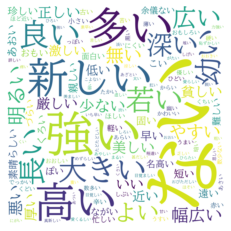

In [19]:
wc = WordCloud(background_color="white", \
               max_words=500, #change if needed\
               font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=900,height=900)

# generate word cloud
## CHANGE (blah)!!!!
wc.generate_from_frequencies(adj_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_fScientist_adj.png")

In [20]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.getElementsByTagName("svg")[0];
    text_tags =  svg.getElementsByTagName("text")
    for(var i=0; i<text_tags.length; i++){
        text_tags[i].addEventListener(
            "click",
            function(){
                word = this.textContent;
                word_uri = encodeURI(word);
                url = "https://jisho.org/search/" + word_uri;
                window.open(url, "_bkank");
            }
        )
    }
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("femaleScientictAdj.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)